In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

#### Node Attributes
1. Outfacing Edge 
2. Infacing Edge  
3. What can be estimated (Object of node's estimates about  another node) 
4. What can be controlled  (Object)
5. In bandwidth constraint 
6. Out bandwidth contraint 
7. List of messages a node has 
8. Message Sizes
8. Storage Capacity for each node

Edge bandwidth constraint should be min(inbound bandwidth at j, outbound bandwidth at i)

In [2]:
from src.sim import run

[{'N': 1, 'T': range(0, 365), 'M': {'block_time': 30, 'i_storage': 500, 'i_in_bandwidth': 500, 'i_out_bandwidth': 140, 'j_storage': 1000, 'j_in_bandwidth': 400, 'j_out_bandwidth': 100, 'p_storage': 4000, 'p_in_bandwidth': 400, 'p_out_bandwidth': 600, 'k_storage': 8000, 'k_in_bandwidth': 400, 'k_out_bandwidth': 80}}, {'N': 1, 'T': range(0, 365), 'M': {'block_time': 30, 'i_storage': 500, 'i_in_bandwidth': 1234, 'i_out_bandwidth': 140, 'j_storage': 1000, 'j_in_bandwidth': 400, 'j_out_bandwidth': 100, 'p_storage': 4000, 'p_in_bandwidth': 400, 'p_out_bandwidth': 600, 'k_storage': 8000, 'k_in_bandwidth': 400, 'k_out_bandwidth': 80}}, {'N': 1, 'T': range(0, 365), 'M': {'block_time': 30, 'i_storage': 500, 'i_in_bandwidth': 5678, 'i_out_bandwidth': 140, 'j_storage': 1000, 'j_in_bandwidth': 400, 'j_out_bandwidth': 100, 'p_storage': 4000, 'p_in_bandwidth': 400, 'p_out_bandwidth': 600, 'k_storage': 8000, 'k_in_bandwidth': 400, 'k_out_bandwidth': 80}}]
[{'N': 1, 'T': range(0, 365), 'M': {'block_tim

In [3]:
experiments = run.run()


                            __________   ____ 
          ________ __ _____/ ____/   |  / __ \
         / ___/ __` / __  / /   / /| | / / / /
        / /__/ /_/ / /_/ / /___/ ___ |/ /_/ / 
        \___/\__,_/\__,_/\____/_/  |_/_____/  
        by BlockScience
        
Execution Mode: multi_proc: [<cadCAD.configuration.Configuration object at 0x000001C99A97E6A0>, <cadCAD.configuration.Configuration object at 0x000001C99A97E6D8>, <cadCAD.configuration.Configuration object at 0x000001C99A97EB38>]
Configurations: [<cadCAD.configuration.Configuration object at 0x000001C99A97E6A0>, <cadCAD.configuration.Configuration object at 0x000001C99A97E6D8>, <cadCAD.configuration.Configuration object at 0x000001C99A97EB38>]


In [4]:
print(experiments)

   index  block_time  i_storage  i_in_bandwidth  i_out_bandwidth  j_storage  \
0      0          30        500             500              140       1000   
1      0          30        500            1234              140       1000   
2      0          30        500            5678              140       1000   

   j_in_bandwidth  j_out_bandwidth  p_storage  p_in_bandwidth  \
0             400              100       4000             400   
1             400              100       4000             400   
2             400              100       4000             400   

   p_out_bandwidth  k_storage  k_in_bandwidth  k_out_bandwidth  \
0              600       8000             400               80   
1              600       8000             400               80   
2              600       8000             400               80   

                                             dataset  
0        timestamp message_array  \
0    2020-01-...  
1        timestamp message_array  \
0    2020-0

In [5]:
end_key = (len(experiments.dataset[0])-1) * max(experiments.dataset[0]['substep'])
end_key

1460

In [6]:
time_ten = max(experiments.dataset[0]['substep']) * 10
experiments.dataset[0]['network'][time_ten] 

In [7]:
# nunique = experiments[[item for item in experiments.columns if item not in ['dataset']]].applymap(str).apply(pd.Series.nunique)
# cols_to_drop = nunique[nunique == 1].index
# experiments_full = experiments.copy()
# experiments = experiments.drop(cols_to_drop, axis=1)
# experiments = experiments_full

In [8]:
experiments.head()

,index,block_time,i_storage,i_in_bandwidth,i_out_bandwidth,j_storage,j_in_bandwidth,j_out_bandwidth,p_storage,p_in_bandwidth,p_out_bandwidth,k_storage,k_in_bandwidth,k_out_bandwidth,dataset
0,0,30,500,500,140,1000,400,100,4000,400,600,8000,400,80,timestamp message_array \ 0 2020-01-...
1,0,30,500,1234,140,1000,400,100,4000,400,600,8000,400,80,timestamp message_array \ 0 2020-01-...
2,0,30,500,5678,140,1000,400,100,4000,400,600,8000,400,80,timestamp message_array \ 0 2020-01-...


In [9]:
end_of_first_experiment = experiments.dataset[0]

In [10]:
experiments.dataset[0]['demand'][end_key]

[1345682176, 119, 1]

In [11]:
# Remove None from message list
message_list = list(filter(any, experiments.dataset[0]['message_list'][end_key])) 
# message_list = [i for i in experiments.dataset[0]['message_list'][540] if i] 
message_list[0:15]

[[1345682944, 143, 5],
 [1345683776, 169, 3],
 [1345684480, 191, 7],
 [1345679008, 20, 5],
 [1345681408, 95, 3],
 [1345681088, 85, 1],
 [1345683968, 175, 5],
 [1345680672, 72, 1],
 [1345678752, 12, 5],
 [1345682368, 125, 5],
 [1345679904, 48, 13],
 [1345682048, 115, 1],
 [1345678848, 15, 11],
 [1345684736, 199, 5],
 [1345679520, 36, 3]]

In [12]:
experiments.dataset[0]['network'][time_ten].nodes['i']['current_capacity']

499

In [13]:
message_array = np.array(message_list[0:5])
message_array

array([[1345682944,        143,          5],
       [1345683776,        169,          3],
       [1345684480,        191,          7],
       [1345679008,         20,          5],
       [1345681408,         95,          3]])

In [14]:
# Lower limit of Message Storage Demand , No Double Storage
message_array[:,1].sum()

618

In [15]:
message_array[:,1:2].prod()

180269708

In [16]:
np.multiply(message_array[:,1], message_array[:,2])

array([ 715,  507, 1337,  100,  285])

In [17]:
np.sum(np.multiply(message_array[:,1], message_array[:,2]))

2944

In [18]:
experiments.dataset[0]['arrival'][time_ten]

[1345678496, 4, 1]

In [19]:
experiments.dataset[0]['demand'][time_ten]

[1345682368, 125, 1]

In [20]:
experiments.dataset[0]['gross_storage_demand'][time_ten]

1087

In [21]:
experiments.dataset[0]['least_storage_demand'][time_ten]

1087

In [22]:
experiments.dataset[1]['network'][end_key].nodes['i']['current_capacity']

500

In [23]:
experiments.dataset[0]['network'][end_key].nodes['i']

{'neighbor_estimate': {},
 'storage_capacity': [500],
 'current_storage': [[None, None, None],
  [None, None, None],
  [1345682944, 143, 5],
  [1345683776, 169, 3],
  [1345679008, 20, 5],
  [1345681408, 95, 3],
  [1345680672, 72, 1],
  [1345678400, 1, 3]],
 'current_capacity': 500,
 'inband': 500,
 'outband': [140],
 'message_history': [[None, None, None], [None, None, None]],
 'control': []}

In [24]:
experiments.dataset[1]['network'][end_key].nodes['i']

{'neighbor_estimate': {},
 'storage_capacity': [500],
 'current_storage': [[None, None, None],
  [None, None, None],
  [1345681696, 104, 1],
  [1345682624, 133, 7],
  [1345680960, 81, 7],
  [1345683264, 153, 3],
  [1345678944, 18, 5],
  [1345678688, 10, 5],
  [1345678400, 1, 5]],
 'current_capacity': 500,
 'inband': 1234,
 'outband': [140],
 'message_history': [[None, None, None], [None, None, None]],
 'control': []}

In [25]:
experiments.dataset[2]['network'][time_ten].nodes['i']

{'neighbor_estimate': {},
 'storage_capacity': [500],
 'current_storage': [[None, None, None],
  [None, None, None],
  [1345684480, 191, 1],
  [1345678528, 5, 1],
  [1345681408, 95, 1],
  [1345681280, 91, 1],
  [1345678912, 17, 1],
  [1345679904, 48, 1],
  [1345679584, 38, 1]],
 'current_capacity': 485,
 'inband': 5678,
 'outband': [140],
 'message_history': [[None, None, None], [None, None, None]],
 'control': []}

In [26]:
experiments.dataset[1]['network'][end_key].nodes['j']

{'neighbor_estimate': {'storage from i': 215,
  'storage from k': 0,
  'messages from i': 311,
  'messages from k': 124},
 'storage_capacity': [1000],
 'current_storage': [[None, None, None],
  [None, None, None],
  [1345681120, 86, 7],
  [1345682848, 140, 7],
  [1345683616, 164, 1],
  [1345684544, 193, 1],
  [1345680480, 66, 5],
  [1345681888, 110, 5],
  [1345683712, 167, 5],
  [1345684160, 181, 5],
  [1345683584, 163, 1],
  [1345679168, 25, 5],
  [1345684480, 191, 3],
  [1345682592, 132, 3],
  [1345683680, 166, 7],
  [1345680928, 80, 3],
  [1345681568, 100, 3],
  [1345682240, 121, 9],
  [1345683808, 170, 3],
  [1345679712, 42, 5],
  [1345680736, 74, 3],
  [1345680608, 70, 1],
  [1345684256, 184, 7],
  [1345683136, 149, 7],
  [1345682112, 117, 9],
  [1345684064, 178, 5],
  [1345682400, 126, 3],
  [1345684416, 189, 7],
  [1345680224, 58, 3],
  [1345679008, 20, 3],
  [1345683776, 169, 1],
  [1345683392, 157, 11],
  [1345683968, 175, 5],
  [1345679840, 46, 3],
  [1345682208, 120, 1],
  [

In [27]:
experiments.dataset[1]['network'][end_key].nodes['k']

{'neighbor_estimate': {'storage from i': 116, 'messages from i': 347},
 'storage_capacity': [8000],
 'current_storage': [[None, None, None],
  [None, None, None],
  [1345683232, 152, 1],
  [1345684320, 186, 5],
  [1345680704, 73, 5],
  [1345684096, 179, 3],
  [1345682304, 123, 7],
  [1345680800, 76, 1],
  [1345681856, 109, 3],
  [1345682144, 118, 1],
  [1345683520, 161, 3],
  [1345681440, 96, 1],
  [1345681376, 94, 7],
  [1345682912, 142, 7],
  [1345682432, 127, 13],
  [1345682496, 129, 3],
  [1345680320, 61, 3],
  [1345679584, 38, 3],
  [1345681536, 99, 1],
  [1345681056, 84, 3],
  [1345679136, 24, 7],
  [1345680352, 62, 3],
  [1345683552, 162, 1],
  [1345678464, 3, 7],
  [1345684672, 197, 1],
  [1345684352, 187, 1],
  [1345680576, 69, 3],
  [1345681152, 87, 3],
  [1345681408, 95, 7],
  [1345679520, 36, 1],
  [1345680448, 65, 5],
  [1345681024, 83, 7],
  [1345683008, 145, 1],
  [1345679968, 50, 3],
  [1345683040, 146, 3],
  [1345681248, 90, 1],
  [1345682080, 116, 3],
  [1345678656, 9

In [28]:
# End network State
G = experiments.dataset[1]['network'][end_key]
pos = nx.spring_layout(G)

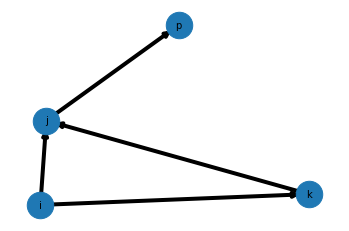

In [29]:
#nx.draw(G)
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, width=4)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
plt.axis('off')
plt.show()

In [30]:
def message_metrics(node_name):
    i_message_list = list(filter(any, experiments.dataset[1]['network'][end_key].nodes[str(node_name)]['current_storage'])) 
    # convert to array
    i_message_array = np.array(i_message_list)
    #print(message_array)
    # sum of sizes of messages without repeats representing the lower bound, if every node only stored the file once
    total = np.nansum(i_message_array[:,1])
    mean = total / len(i_message_array)
    total_freq = np.nansum(i_message_array[:,2])
    freq = total_freq / len(i_message_array)
    
    return print('Node ', node_name, ": Average Stored Size = ", format(mean, ".2f"), ", Average Frequency = ", format(freq, ".2f"))

In [31]:
message_metrics('i')
message_metrics('j')
message_metrics('k')

Node  i : Average Stored Size =  71.43 , Average Frequency =  4.71
Node  j : Average Stored Size =  105.86 , Average Frequency =  4.18
Node  k : Average Stored Size =  96.70 , Average Frequency =  2.87


In [32]:
storage_efficiency = experiments.dataset[1]['least_storage_demand'][end_key] / experiments.dataset[1]['gross_storage_demand'][end_key]
print("Storage Efficiency = ",format(storage_efficiency, ".1%"))

Storage Efficiency =  27.4%


In [33]:
def failed_message(node_name):
    message_list = list(filter(any, experiments.dataset[1]['network'][end_key].nodes[str(node_name)]['current_storage'])) 
    # convert to array
    message_array = np.array(message_list)
    fail_message = np.where(message_array[:,0] == 0)
    fail_count = message_array[fail_message,2]
    if fail_count.size == 0:
        fail_count = 0
    else:
        fail_count = fail_count[0][0]
    return print("Node ", node_name, ": Failed Messages =", fail_count)

In [34]:
failed_message('i')
failed_message('j')
failed_message('k')

Node  i : Failed Messages = 0
Node  j : Failed Messages = 0
Node  k : Failed Messages = 0


In [35]:
experiments.dataset[1]['network'][end_key].adj['i']

AtlasView({'j': {'traffic': 148}, 'k': {'traffic': 0}})

In [36]:
experiments.dataset[1]['network'][end_key].adj['k']

AtlasView({'j': {'traffic': 59}})

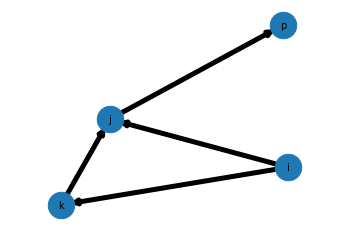

In [37]:
G = experiments.dataset[1]['network'][time_ten]

uppest_traffic = [(u, v) for (u, v, d) in G.edges(data=True) if d['traffic'] > 75]
upper_traffic = [(u, v) for (u, v, d) in G.edges(data=True) if 75 > d['traffic'] > 50]
lower_traffic = [(u, v) for (u, v, d) in G.edges(data=True) if 50 > d['traffic'] > 25]
lowest_traffic = [(u, v) for (u, v, d) in G.edges(data=True) if d['traffic'] < 25]

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=700)
# for i in edge_traffic:
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')    
# nx.draw_networkx_edges(G, pos, width=1, edge_list=lowest_traffic, edge_color='g')
# nx.draw_networkx_edges(G, pos, width=7, edge_list=uppest_traffic, edge_color='b')
nx.draw_networkx_edges(G, pos, width=5, edge_list=upper_traffic)
# nx.draw_networkx_edges(G, pos, edge_list=lower_traffic)




plt.axis('off')
plt.show()

In [38]:
 G.edges

OutEdgeView([('i', 'j'), ('i', 'k'), ('j', 'p'), ('k', 'j')])

In [39]:
for (u, v, d) in G.edges(data=True):
    print(d['traffic'])

76
0
0
10


In [40]:
# edge_color=colors,
#         width=4, edge_cmap=plt.cm.Blues, with_labels=False

In [41]:
uppest_traffic

[('i', 'j')]

In [42]:
upper_traffic

[]

In [43]:
lowest_traffic

[('i', 'k'), ('j', 'p'), ('k', 'j')]

In [44]:
temp_list = [1,2,3]

In [45]:
temp_list.copy()

[1, 2, 3]